   Wavelength        I
0   485.67000  0.40430
1   485.67005  0.40438
2   485.67010  0.40425
3   485.67015  0.40415
4   485.67020  0.40422


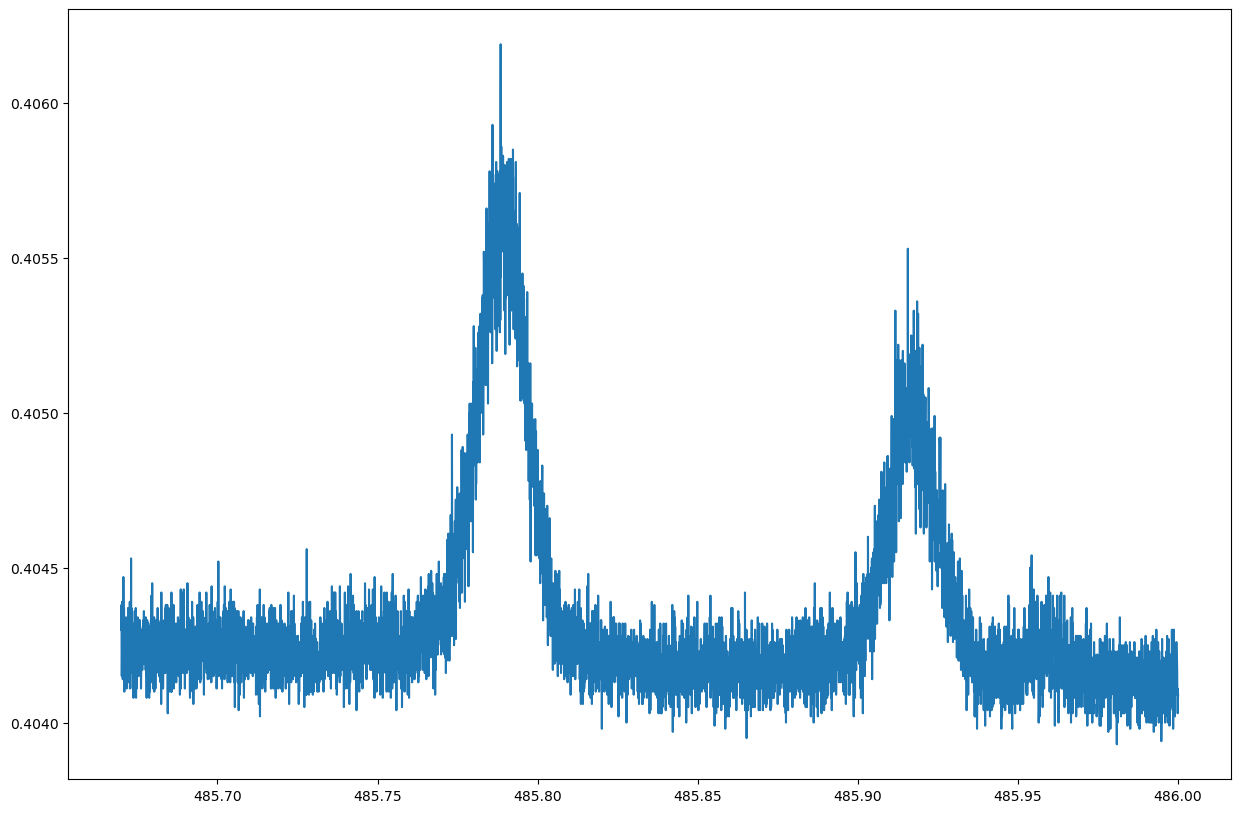

In [1]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting
from scipy.optimize import curve_fit # curve fit class


##############
# Import data
##############

df_H2D2 = pd.read_csv("H2D2_Spectra_486.csv") # create pandas dataframe
print(df_H2D2.head()) # print first 5 rows


##############
# Plot data
##############

x_H2D2 = df_H2D2["Wavelength"] # grab column
y_H2D2 = df_H2D2["I"] # grab column
plt.figure(figsize=(15,10))
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intesity (I)")
plt.title("Raw Data Plot")
plt.plot(x_H2D2, y_H2D2)
plt.show()

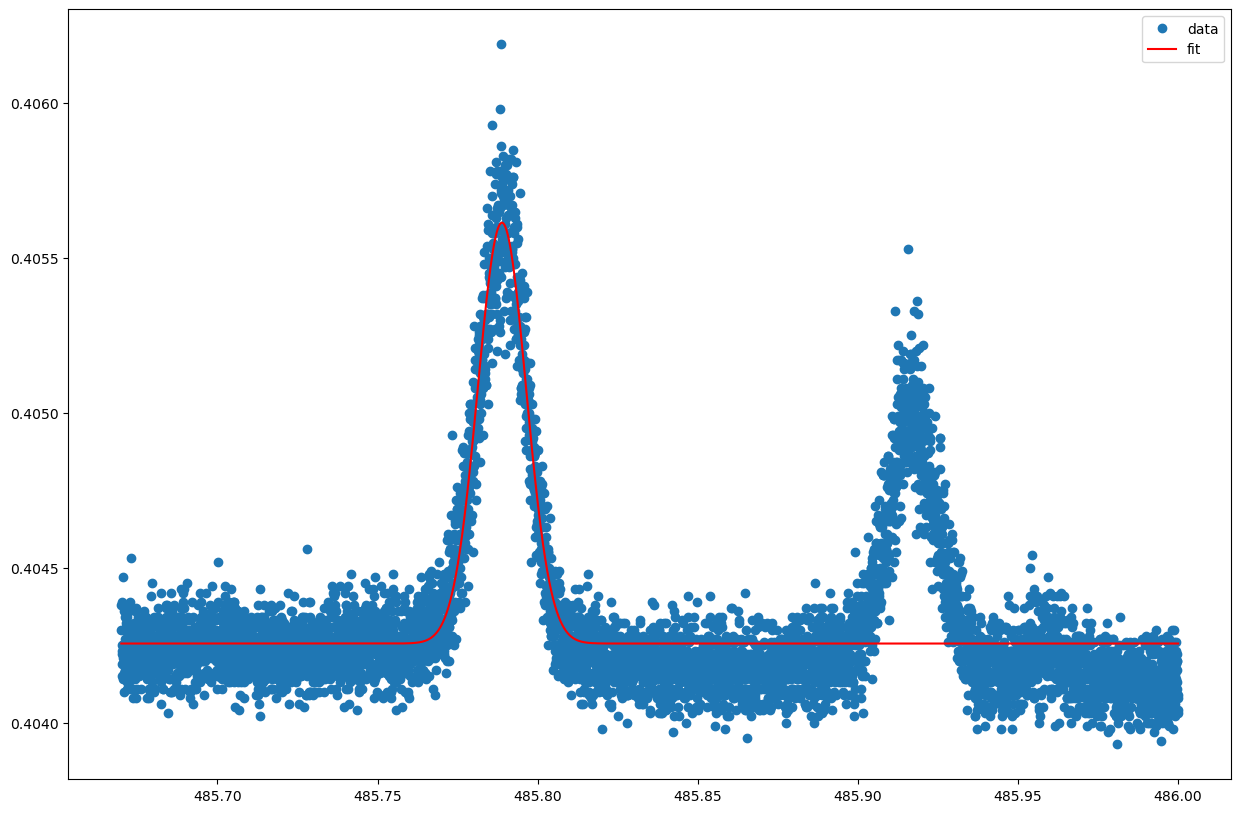

In [4]:
########################
# Input constant values
########################

a_H2 = 0.002 # amplitude                   
mean_H2 = 485.79 # middle of graph                 
h_H2 = .403 # vertical shift                  
sigma_H2 = 0.025 # width displacement


################################
# Define the Gaussian function
# takes in constants, solves 
# equation, returns value
################################

def gaus(x_H2D2, a_H2, mean_H2, sigma_H2, h_H2):
    fit = a_H2*np.exp((-(x_H2D2-mean_H2)**2)/(2*sigma_H2**2)) + h_H2
    return fit


#####################
# Fit the data using
# curve fit class
#####################

popt_H2, pcov_H2 = curve_fit(gaus, x_H2D2, y_H2D2, p0=[a_H2, mean_H2, sigma_H2, h_H2]) # solves for a, mean, sigma, h
y_H2_fit = gaus(x_H2D2, *popt_H2) # creates y(x) = gaus function with fitted values


#################
# Plot Fit Curve
#################

plt.figure(figsize=(15,10))
plt.plot(x_H2D2, y_H2D2, 'o', label="data")
plt.plot(x_H2D2, y_H2_fit, 'r-', label='fit')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intesity (I)")
plt.title("Hydrogen Gaussian Plot")
plt.legend()
plt.show()

In [5]:
#####################
# Print fit data
# Print uncertainty
#####################
print("Fit Amplitude: ", popt_H2[0],
      "\n Fit Mean (Wavelength): ", popt_H2[1],
      "\n Fit Sigma (distance from mean to sides): ", popt_H2[2],
      "\n Fit Height: ", popt_H2[3])

print("\n Uncertainty matrix (uncertainties lie along diagonal): \n", pcov_H2)

Fit Amplitude:  0.0013587157760154539 
 Fit Mean (Wavelength):  485.78885458930495 
 Fit Sigma (distance from mean to sides):  0.007547768977967414 
 Fit Height:  0.4042552653939441

 Uncertainty matrix (uncertainties lie along diagonal): 
 [[ 1.84946452e-10  6.47102859e-13 -6.43408210e-10 -3.96207684e-12]
 [ 6.47102859e-13  7.49396840e-09 -3.59449138e-12 -1.18886700e-18]
 [-6.43408210e-10 -3.59449138e-12  7.83976629e-09 -4.40180755e-11]
 [-3.96207684e-12 -1.18886700e-18 -4.40180755e-11  5.60322302e-12]]


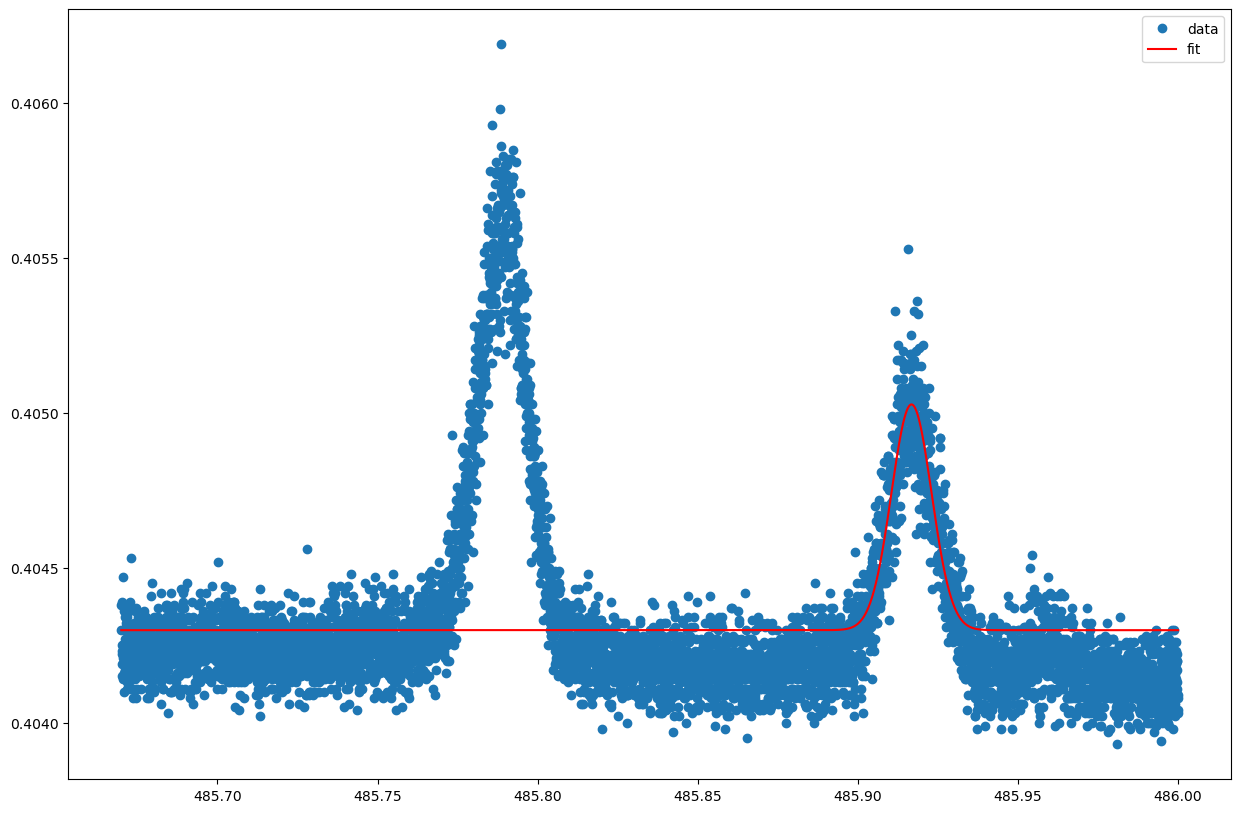

In [6]:
########################
# Input constant values
########################

a_D2 = 0.001 # amplitude                   
mean_D2 = 485.925 # middle of graph                 
h_D2 = .403 # vertical shift                  
sigma_D2 = 0.025 # width displacement


################################
# Define the Gaussian function
# takes in constants, solves 
# equation, returns value
################################

def gaus(x_D2, a_D2, mean_D2, sigma_D2, h_D2):
    fit = a_D2*np.exp((-(x_H2D2-mean_D2)**2)/(2*sigma_D2**2)) + h_D2
    return fit


#####################
# Fit the data using
# curve fit class
#####################

popt_D2, pcov_D2 = curve_fit(gaus, x_H2D2, y_H2D2, p0=[a_D2, mean_D2, sigma_D2, h_D2]) # solves for a, mean, sigma, h
y_D2_fit = gaus(x_H2D2, *popt_D2) # creates y(x) = gaus function with fitted values


#################
# Plot Fit Curve
#################

plt.figure(figsize=(15,10))
plt.plot(x_H2D2, y_H2D2, 'o', label="data")
plt.plot(x_H2D2, y_D2_fit, 'r-', label='fit')
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intesity (I)")
plt.title("Deuterium Gaussian Plot")
plt.legend()
plt.show()

In [7]:
#####################
# Print fit data
# Print uncertainty
#####################
print("Fit Amplitude: ", popt_D2[0],
      "\n Fit Mean (Wavelength): ", popt_D2[1],
      "\n Fit Sigma (distance from mean to sides): ", popt_D2[2],
      "\n Fit Height: ", popt_D2[3])

print("\n Uncertainty matrix (uncertainties lie along diagonal): \n", pcov_D2)

Fit Amplitude:  0.0007288192919039305 
 Fit Mean (Wavelength):  485.9167418903065 
 Fit Sigma (distance from mean to sides):  -0.006276418951356243 
 Fit Height:  0.4042984100642335

 Uncertainty matrix (uncertainties lie along diagonal): 
 [[ 5.77342716e-10  3.77761858e-12  3.15135904e-09 -1.00804696e-11]
 [ 3.77761858e-12  5.63998541e-08  3.25369677e-11  3.50894493e-18]
 [ 3.15135904e-09  3.25369677e-11  5.85149489e-08  1.73644562e-10]
 [-1.00804696e-11  3.50894493e-18  1.73644562e-10  1.42559329e-11]]
